In [3]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [16]:
# Import .csv file and convert it to a DataFrame object
df=pd.read_csv("C:\\Users\\usr\\downloads\\crime.csv")
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [17]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [18]:
df_norm = norm_func(df.iloc[:,1:])
df_norm.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000
std,0.262380,0.285403,0.245335,0.242025
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904
50%,0.388554,0.390411,0.576271,0.330749
75%,0.629518,0.698630,0.775424,0.487726
max,1.000000,1.000000,1.000000,1.000000


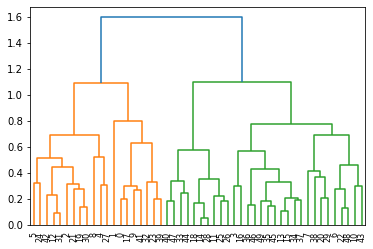

In [22]:
df.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [ ]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [47]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
y_hc

array([0, 3, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 2, 2, 0, 1, 0, 2, 0,
       2, 0, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2,
       1, 2, 2, 1, 2, 2], dtype=int64)

In [48]:
df_norm['h_clusterid'] = pd.Series(y_hc)
df_norm

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,3
2,0.439759,0.852740,0.813559,0.612403,0
3,0.481928,0.496575,0.305085,0.315245,2
4,0.493976,0.791096,1.000000,0.860465,0
5,0.427711,0.544521,0.779661,0.811370,0
6,0.150602,0.222603,0.762712,0.098191,2
7,0.307229,0.660959,0.677966,0.219638,2
8,0.879518,0.993151,0.813559,0.635659,0
9,1.000000,0.568493,0.474576,0.478036,0


In [49]:
df_norm['h_clusterid'] = pd.Series(y_hc)
df['h_clusterid']=pd.Series(y_hc)

In [50]:
result=df.iloc[:,0:].groupby(df.h_clusterid).mean()
result

,Murder,Assault,UrbanPop,Rape,h_clusterid
h_clusterid,,,,,
0,12.278947,254.842105,69.473684,28.357895,0.0
1,3.180000,78.700000,49.300000,11.630000,1.0
2,5.715000,132.300000,70.800000,18.100000,2.0
3,10.000000,263.000000,48.000000,44.500000,3.0


In [23]:
###### screw plot or elbow curve ############
k = list(range(2,15))
#k

In [24]:
from sklearn.cluster import	KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [25]:
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x202b1463250>,
 <a list of 13 Text major ticklabel objects>)

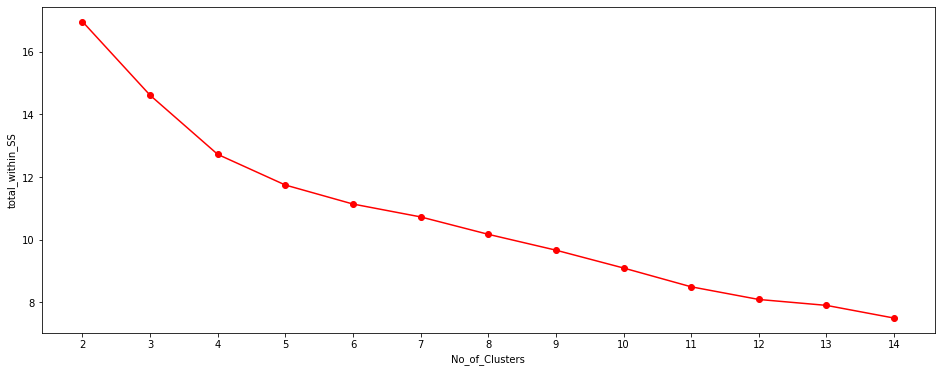

In [26]:
# Scree plot 

plt.figure(figsize=(16,6))
plt.plot(k,TWSS,'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [27]:
# Selecting 4 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=4) 
model.fit(df_norm)

KMeans(n_clusters=4)

In [28]:
model.labels_ # getting the labels of clusters assigned to each row 

array([3, 2, 2, 3, 2, 2, 1, 1, 2, 3, 1, 0, 2, 1, 0, 1, 0, 3, 0, 2, 1, 2,
       0, 3, 1, 0, 0, 2, 0, 1, 2, 2, 3, 0, 1, 1, 1, 1, 1, 3, 0, 3, 2, 1,
       0, 1, 1, 0, 0, 1])

In [29]:
model.cluster_centers_

array([[0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951],
       [0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408]])

In [31]:
X = df[['Murder', 'Assault', 'Rape', 'UrbanPop']]
clusters = KMeans(4)  # 4 clusters!
clusters.fit( X )
clusters.cluster_centers_
clusters.labels_
df['df_clusters'] = clusters.labels_
df.head()
df.sort_values(by=['df_clusters'],ascending = True)
X.head()

,Murder,Assault,Rape,UrbanPop
0,13.2,236,21.2,58
1,10.0,263,44.5,48
2,8.1,294,31.0,80
3,8.8,190,19.5,50
4,9.0,276,40.6,91


In [33]:
stats =df.sort_values("Murder", ascending=True)
stats

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,df_clusters
33,North Dakota,0.8,45,44,7.3,1
28,New Hampshire,2.1,57,56,9.5,1
18,Maine,2.1,83,51,7.8,1
14,Iowa,2.2,56,57,11.3,1
44,Vermont,2.2,48,32,11.2,1
48,Wisconsin,2.6,53,66,10.8,1
11,Idaho,2.6,120,54,14.2,3
22,Minnesota,2.7,72,66,14.9,1
43,Utah,3.2,120,80,22.9,3
6,Connecticut,3.3,110,77,11.1,3


C:\Users\usr\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


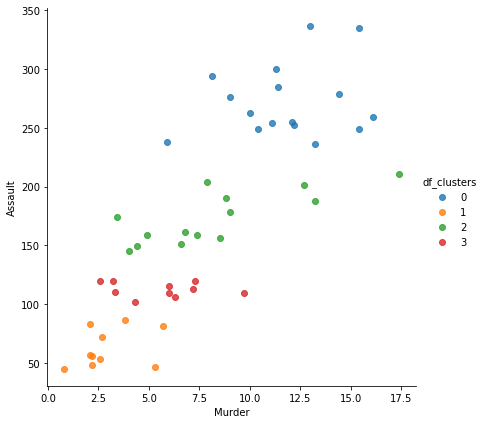

In [37]:
# Plot between pairs Murder~Assault
sns.lmplot( 'Murder','Assault',  data=df,
        hue = 'df_clusters',
        fit_reg=False, size = 6 );

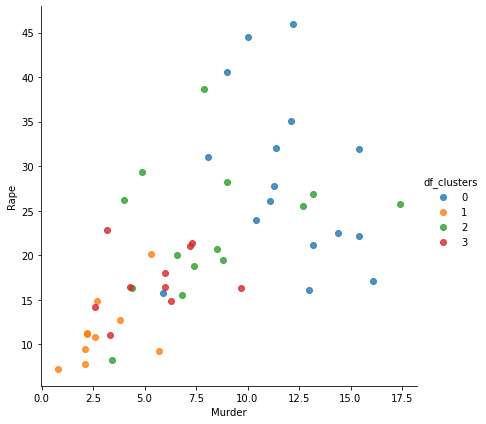

In [38]:
# Plot between pairs Murder~Rape
sns.lmplot( 'Murder','Rape',  data=df,
        hue = 'df_clusters',
        fit_reg=False, size = 6 );

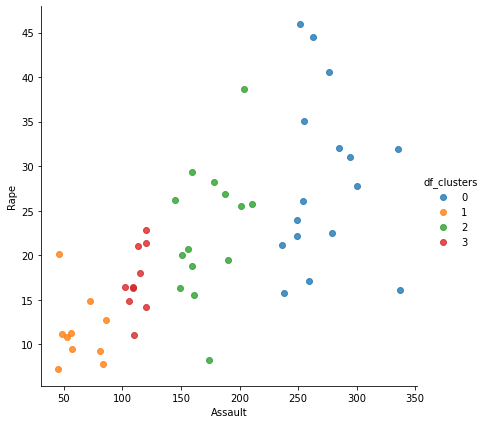

In [39]:
# Plot between pairs Assault~Rape
sns.lmplot( 'Assault','Rape',  data=df,
        hue = 'df_clusters',
        fit_reg=False, size = 6 );

In [1]:
inference = as per summary we can group 2 have the higher  rate of crime

SyntaxError: invalid syntax (<ipython-input-1-872809b9f0d8>, line 1)

In [6]:
data=pd.read_excel("C:\\Users\\usr\\Desktop\\New folder\\EastWestAirlines.xlsx",sheet_name="data")
print (data)


       ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0        1    28143           0          1          1          1          174   
1        2    19244           0          1          1          1          215   
2        3    41354           0          1          1          1         4123   
3        4    14776           0          1          1          1          500   
4        5    97752           0          4          1          1        43300   
...    ...      ...         ...        ...        ...        ...          ...   
3994  4017    18476           0          1          1          1         8525   
3995  4018    64385           0          1          1          1          981   
3996  4019    73597           0          3          1          1        25447   
3997  4020    54899           0          1          1          1          500   
3998  4021     3016           0          1          1          1            0   

      Bonus_trans  Flight_m

In [3]:
data.shape

(3999, 12)

In [4]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [14]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [15]:
data_norm = norm_func(data.iloc[:,1:])
data_norm.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.043172,0.012927,0.264879,0.007252,0.003063,0.065020,0.134906,0.014929,0.025917,0.496330,0.370343
std,0.059112,0.069399,0.344230,0.073825,0.048810,0.091590,0.111672,0.045436,0.071569,0.248991,0.482957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010868,0.000000,0.000000,0.000000,0.000000,0.004741,0.034884,0.000000,0.000000,0.280685,0.000000
50%,0.025279,0.000000,0.000000,0.000000,0.000000,0.027195,0.139535,0.000000,0.000000,0.493610,0.000000
75%,0.054201,0.000000,0.500000,0.000000,0.000000,0.090261,0.197674,0.010092,0.018868,0.697914,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 

In [8]:
data = linkage( data_norm,method="complete",metric="euclidean")

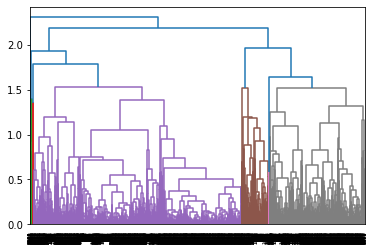

In [11]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(data_norm, method='complete'))

In [20]:
data.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


In [21]:
###### screw plot or elbow curve ############
k1 = list(range(2,20))
#k

In [27]:
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k1:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(data_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,data_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x2837e4f6400>,
 <a list of 18 Text major ticklabel objects>)

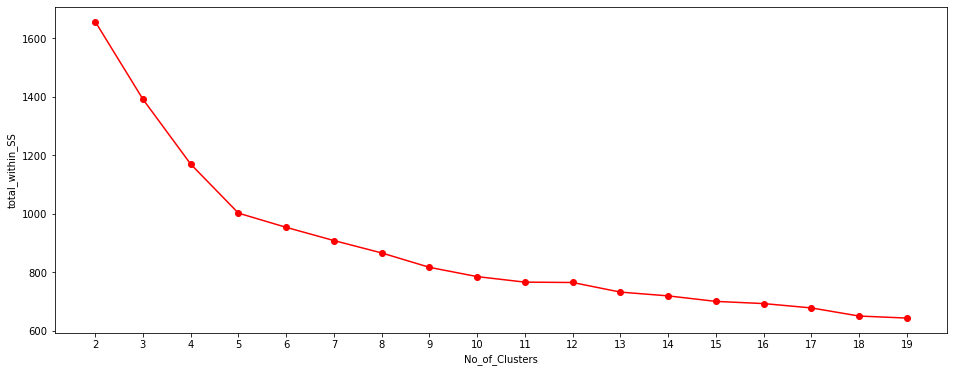

In [28]:
# Scree plot 

plt.figure(figsize=(16,6))
plt.plot(k1,TWSS,'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k1)

In [26]:
X1 = data[['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll','Award?']]
clusters = KMeans(4)  # 4 clusters!
clusters.fit( X1 )
clusters.cluster_centers_
clusters.labels_
data['data_clusters'] = clusters.labels_
data.head()
data.sort_values(by=['data_clusters'],ascending = True)
X1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [27]:
stats1 =data.sort_values("Days_since_enroll", ascending=True)
stats1

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,data_clusters
3697,3720,972,972,1,1,1,0,0,0,0,2,0,0
3696,3719,862,0,1,1,1,0,0,0,0,8,0,0
3722,3745,3230,0,1,1,1,0,0,0,0,10,0,0
3725,3748,2627,0,1,1,1,0,0,0,0,25,0,0
3747,3770,6015,4929,1,1,1,0,0,0,0,30,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,416,620498,0,5,1,1,25395,53,1750,14,8296,1,3
409,415,10732,0,1,1,1,1296,6,0,0,8296,0,0
408,414,5581,0,1,1,1,0,0,0,0,8296,0,0
415,421,109087,0,2,1,1,10462,16,0,0,8296,1,1


C:\Users\usr\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


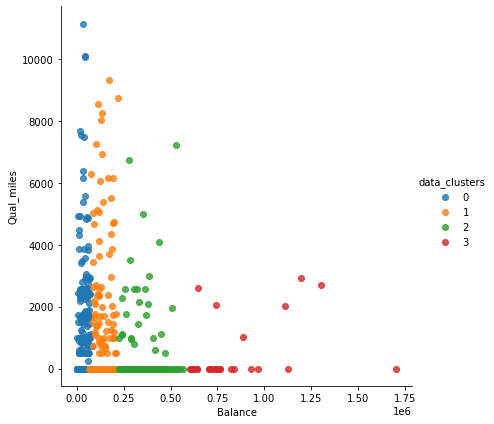

In [28]:
# Plot between pairs Balance~Qual_miles
sns.lmplot( 'Balance','Qual_miles',  data=data,
        hue = 'data_clusters',
        fit_reg=False, size = 6 );

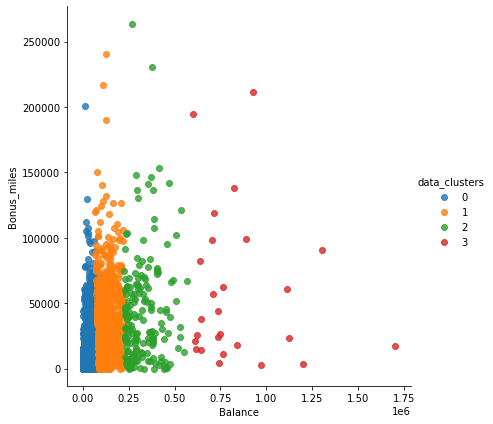

In [29]:
# Plot between pairs Balance~Bonus_miles
sns.lmplot( 'Balance','Bonus_miles',  data=data,
        hue = 'data_clusters',
        fit_reg=False, size = 6 );

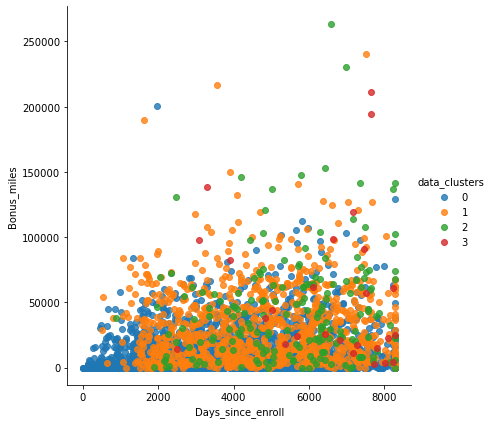

In [30]:
# Plot between pairs Days_since_enroll~Bonus_miles
sns.lmplot( 'Days_since_enroll','Bonus_miles',  data=data, hue = 'data_clusters',fit_reg=False, size = 6 );
       
        

In [16]:
# Selecting 4 clusters from the above scree plot which is the optimum number of clusters 
model1=KMeans(n_clusters=4) 
model1.fit(data_norm)

KMeans(n_clusters=4)

In [17]:
model1.labels_ # getting the labels of clusters assigned to each row 

array([1, 1, 1, ..., 3, 1, 1])

In [18]:
model1.cluster_centers_

array([[ 4.89953609e-02,  2.60542873e-02,  3.90044577e-02,
         1.63447251e-02,  2.22882615e-03,  3.35642727e-02,
         1.21825219e-01,  3.34267751e-02,  5.94073285e-02,
         5.22892182e-01,  1.00000000e+00],
       [ 2.39011667e-02,  8.28362120e-03,  2.31945177e-02,
         8.96151819e-03,  1.05429626e-03,  1.26482465e-02,
         7.54496083e-02,  7.35308092e-03,  1.24327389e-02,
         4.36111859e-01,  7.21644966e-16],
       [ 6.92335936e-02,  6.55837114e-03,  6.44122383e-01,
         8.05152979e-04,  5.63607085e-03,  1.18636504e-01,
         2.00595439e-01,  7.31260853e-03,  1.19405706e-02,
         5.34640411e-01, -2.77555756e-16],
       [ 6.35352962e-02,  1.77912301e-02,  7.28960396e-01,
         6.18811881e-04,  6.49752475e-03,  1.72970238e-01,
         2.34903868e-01,  2.31602349e-02,  4.04212591e-02,
         5.86139300e-01,  1.00000000e+00]])